# 4.7 보궐선거 데이터 정량적 분석
- 데이터 출처 종류 확인
- 언론사별 각 정당에 대한 평가
- 지역별 정당에 대한 긍정도
- 지역별 후보에 대한 긍정도
- 정당 평가와 후보자 평가의 상관관계

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 13,8
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 데이터 불러오기
df = pd.read_csv('../data/재보궐선거댓글데이터_최종_유튜브수정_0429.csv')
df

제목  \
0                    [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?   
1                    [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?   
2                    [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?   
3                    [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?   
4                    [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?   
...                                                   ...   
144134  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”   
144135  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”   
144136  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”   
144137  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”   
144138  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”   

                         날짜                  작성일  \
0       2021-03-07 05:57:00  2021-03-12 19:13:00   
1       2021-03-07 05:57:00  2021-03-09 13:49:00   
2       2021-03-07 05:57:00  2021-03-07 14:42:00   
3       2021-03-07 05:57:00  2021-03-07 14:38:00   
4       2021-03-07 05:57:00  2021-03-07 14:02:00   
...                     ...                  ...   
144134  2021-04-06 21:56:00  2021-04-06 22:47:00   
144135  2021-04-06 21:56:00  2021-04-06 22:41:00   
144136  2021-04-06 21:56:00  2021-04-06 22:38:00   
144137  2021-04-06 21:56:00  2021-04-06 22:32:00   
144138  2021-04-06 21:56:00  2021-04-06 22:26:00   

                                                       댓글    출처  \
0                         철수야! 뜸 들이지 말고 애국하는 마음으로 물러서라~~~  조선일보   
1       박영선은 정동영이 얻은 36프로선에 머무를것. 4.7.이후 OOO정권은 몰락의 길 ...  조선일보   
2                           빵선이가서울시장되면서울은공산국가수도제2의평양이될것이다  조선일보   
3       서울시장후보더듬당박빵선이는절대로서울시장을할수없다이유는가족은미국.영국에 영주권자이므로...  조선일보   
4       부산은오거돈선거이고 오거돈치부선거아닌가 오거돈에 성추해으로 생긴선거가 가독도신공항은...  조선일보   
...                                                   ...   ...   
144134  국민의힘 찍지 말라고 이 뉴스가 나온거임\r\n내냔에 국민의힘 찍을라 했드만 망했다...  경향신문   
144135  굳이 일본과 해저터널 해야되는 이유가 없은이유\r\n-일본은고속도로비가 비싸다\r\...  경향신문   
144136         도랏구나. 열도는 걍 갈라파고스로 남겨 둬라. 재난 난민 넘어 오면 귀찮다.  경향신문   
144137                          이걸 왜 하지? 우리한테 아무런 의미가 없는데  경향신문   
144138  우리에겐 아무런 도움이 되지 않는 것을 일본에게는 엄청난 기회가 되는 것을 왜 굳이...  경향신문   

        지역(서울:1, 부산:2)  정당(1:더불어민주당,2:국민의힘)  정당평가(부정;0, 긍정:1)  후보(기호 순)  \
0                  NaN                  NaN               NaN       NaN   
1                  1.0                  NaN               NaN       1.0   
2                  1.0                  NaN               NaN       1.0   
3                  1.0                  1.0               0.0       1.0   
4                  2.0                  1.0               0.0       NaN   
...                ...                  ...               ...       ...   
144134             NaN                  NaN               NaN       NaN   
144135             NaN                  NaN               NaN       NaN   
144136             NaN                  NaN               NaN       NaN   
144137             NaN                  NaN               NaN       NaN   
144138             NaN                  NaN               NaN       NaN   

        후보평가(부정;0, 긍정:1)                                               제목댓글  
0                    NaN  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 철수야! 뜸 들이...  
1                    0.0  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 박영선은 정동영이...  
2                    0.0  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 빵선이가서울시장되...  
3                    0.0  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 서울시장후보더듬당...  
4                    NaN  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 부산은오거돈선거이...  
...                  ...                                                ...  
144134               NaN  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...  
144135               NaN  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...  
144136               NaN  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...  
144137               NaN  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...  
144138               NaN  [논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...  

[144139 rows x 11 columns]

In [5]:
# 데이터 구조
df.shape

(144139, 11)

In [6]:
# 컬럼 이름
df.columns

Index(['제목', '날짜', '작성일', '댓글', '출처', '지역(서울:1, 부산:2)', '정당(1:더불어민주당,2:국민의힘)',
       '정당평가(부정;0, 긍정:1)', '후보(기호 순)', '후보평가(부정;0, 긍정:1)', '제목댓글'],
      dtype='object')

In [7]:
# 제목과 댓글은 '제목 댓글 컬럼' 존재로 삭제
# 기사가 작성된 날짜는 삭제
df2 = df.drop( columns=['제목','날짜','댓글'])

In [8]:
df2.columns

Index(['작성일', '출처', '지역(서울:1, 부산:2)', '정당(1:더불어민주당,2:국민의힘)',
       '정당평가(부정;0, 긍정:1)', '후보(기호 순)', '후보평가(부정;0, 긍정:1)', '제목댓글'],
      dtype='object')

In [9]:
# 컬럼 이름 영어로 변경
cols = ['date','press','area', 'party','party_eval', 
        'candidate','candidate_eval','title_comment']
df2.columns = cols
df2.head()

date press  area  party  party_eval  candidate  \
0  2021-03-12 19:13:00  조선일보   NaN    NaN         NaN        NaN   
1  2021-03-09 13:49:00  조선일보   1.0    NaN         NaN        1.0   
2  2021-03-07 14:42:00  조선일보   1.0    NaN         NaN        1.0   
3  2021-03-07 14:38:00  조선일보   1.0    1.0         0.0        1.0   
4  2021-03-07 14:02:00  조선일보   2.0    1.0         0.0        NaN   

   candidate_eval                                      title_comment  
0             NaN  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 철수야! 뜸 들이...  
1             0.0  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 박영선은 정동영이...  
2             0.0  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 빵선이가서울시장되...  
3             0.0  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 서울시장후보더듬당...  
4             NaN  [재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 부산은오거돈선거이...

In [17]:
df2[['party_eval','candidate_eval']]

party_eval  candidate_eval
0              NaN             NaN
1              NaN             0.0
2              NaN             0.0
3              0.0             0.0
4              0.0             NaN
...            ...             ...
144134         NaN             NaN
144135         NaN             NaN
144136         NaN             NaN
144137         NaN             NaN
144138         NaN             NaN

[144139 rows x 2 columns]

In [10]:
# 데이터 타입 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144139 entries, 0 to 144138
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            144139 non-null  object 
 1   press           144139 non-null  object 
 2   area            4269 non-null    float64
 3   party           2277 non-null    float64
 4   party_eval      2043 non-null    float64
 5   candidate       4363 non-null    float64
 6   candidate_eval  2593 non-null    float64
 7   title_comment   144139 non-null  object 
dtypes: float64(5), object(3)
memory usage: 8.8+ MB


In [11]:
# 결측치 확인
df2.isna().sum()

date                   0
press                  0
area              139870
party             141862
party_eval        142096
candidate         139776
candidate_eval    141546
title_comment          0
dtype: int64

In [12]:
# null이 아닌 값이 얼마나 있는지 확인
df2.notnull().sum()

date              144139
press             144139
area                4269
party               2277
party_eval          2043
candidate           4363
candidate_eval      2593
title_comment     144139
dtype: int64

# 데이터 분석

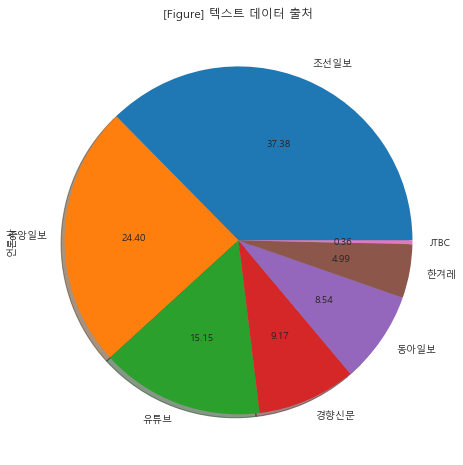

In [13]:
# 언론사 및 텍스트 데이터 출처
plt.title('[Figure] 텍스트 데이터 출처')
df2['press'].value_counts().plot(kind='pie',autopct='%.2f', shadow=True)
plt.ylabel('언론사')
plt.show()

## 1. 직접 라벨링한 데이터의 언론사별 정당에 대한 긍정률

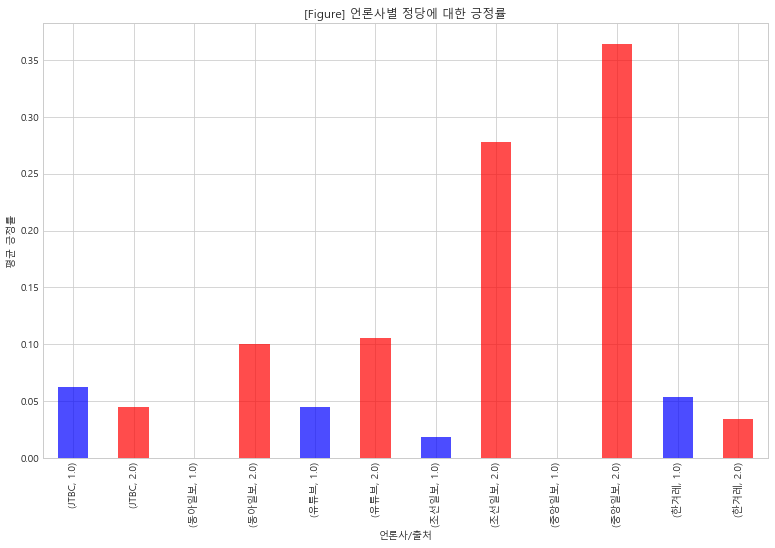

In [14]:
tmp = df2.groupby( ['press', 'party'] ).mean()['party_eval']

tmp.plot(kind='bar', color=['b','r'], alpha=0.7)
plt.xlabel('언론사/출처')
plt.ylabel('평균 긍정률')
plt.title('[Figure] 언론사별 정당에 대한 긍정률')
plt.show()

- 언론사별 여당/야당에 대한 긍정률이 차이가 있음

## 2. 직접 라벨링한 데이터의 지역별 [정당]에 대한 긍정률

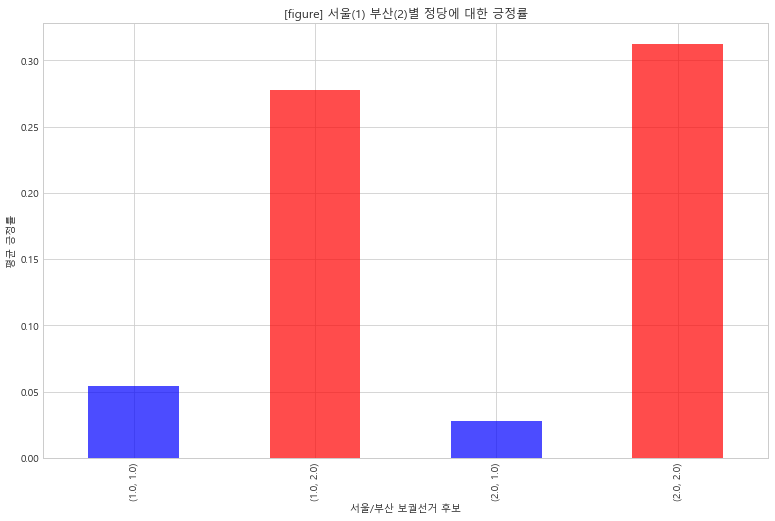

In [13]:
tmp = df2.groupby(['area','party']).mean()['party_eval']
tmp.plot(kind='bar', color=['b','r'], alpha=0.7)
plt.title('[figure] 서울(1) 부산(2)별 정당에 대한 긍정률')
plt.xlabel('서울/부산 보궐선거 후보')
plt.ylabel('평균 긍정률')
plt.show()

- 서울 부산 모두 야당(2.0, 국민의 힘)의 긍정률이 더 높은 것을 알 수 있다.

## 3. 직접 라벨링한 데이터의 지역별 [후보]에 대한 긍정률
- 각 지역별 후보번호 5번은 **기타**

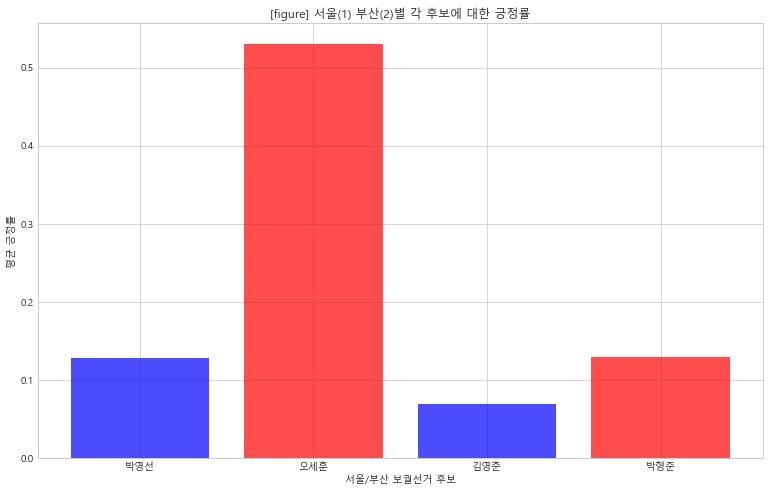

In [14]:
tmp = df2.groupby(['area','candidate']).mean()[['candidate_eval']]
seoul_candidates = tmp.loc[1.0].loc[[1.0,2.0]]
busan_candidates = tmp.loc[2.0].loc[[1.0,2.0]]

plt.bar( ['박영선','오세훈','김영춘','박형준'], 
        pd.concat( [seoul_candidates, busan_candidates], axis=0 )['candidate_eval'],
        color=['b','r'],alpha=0.7)

plt.title('[figure] 서울(1) 부산(2)별 각 후보에 대한 긍정률')
plt.xlabel('서울/부산 보궐선거 후보')
plt.ylabel('평균 긍정률')
plt.show()

- 5번(기타)를 제외하면 서울/부산에서 각 2번 후보의 긍정률이 더 높은 것을 알 수 있다.

## 4. 정당 평가와 후보자 평가의 상관관계

In [15]:
df2.corr().loc['party_eval','candidate_eval']

0.3469361358228576

- 정당에 대한 긍정률과 후보자에 대한 긍정률은 약한 양의 상관관계를 갖고 있음

## 5. 댓글 수집 기간별 데이터수

In [30]:
# 시간과 댓글내용 
df3 = df2[['date','title_comment']]

# date 컬럼의 데이터 타입을 datetime으로 바꿔주기
df3['date'] = pd.to_datetime( df3['date'] )

# date 컬럼을 인덱스로 지정
df3.set_index(['date'], inplace=True)

C:\Users\master4\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


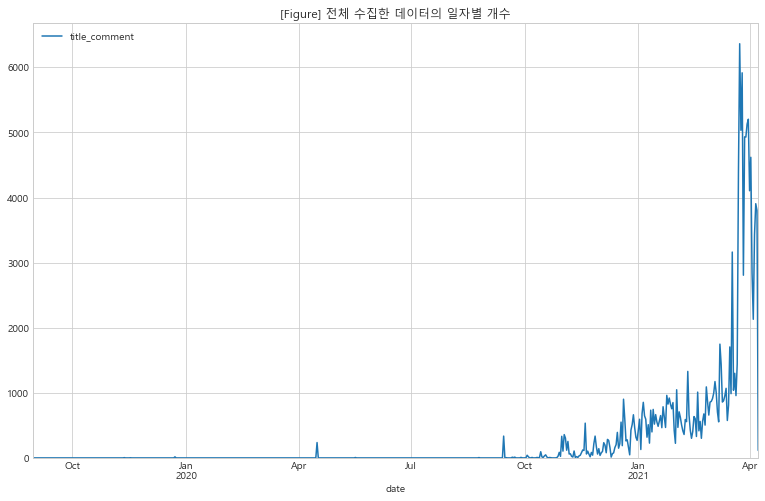

In [71]:
df3.resample('D').count().plot()
plt.title('[Figure] 전체 수집한 데이터의 일자별 개수')
plt.ylim(0,)
plt.show()

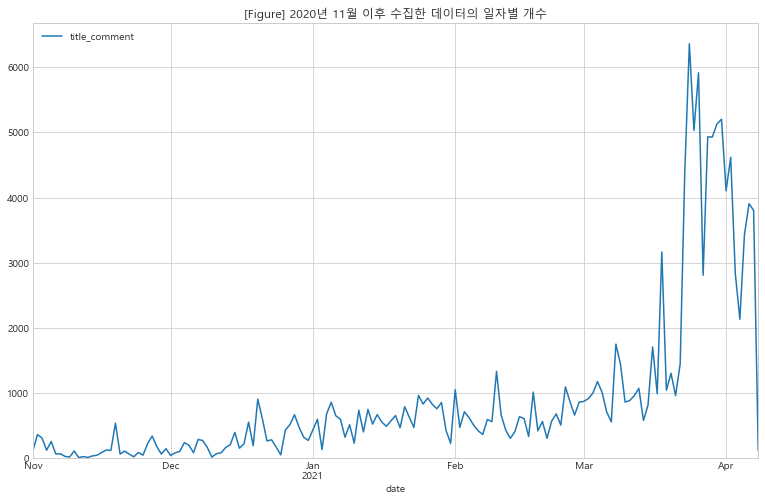

In [70]:
df3.resample('D').count()['2020-11': ].plot()
plt.title('[Figure] 2020년 11월 이후 수집한 데이터의 일자별 개수')
plt.ylim(0,)
plt.show()